In [1]:
from math import pi
theta = pi/4

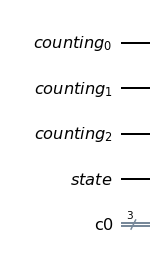

In [2]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
n = 3
q1 = QuantumRegister(n,name='counting')
q2 = QuantumRegister(1,name='state')
c = ClassicalRegister(n)
qc = QuantumCircuit(q1,q2,c)
qc.draw('mpl')

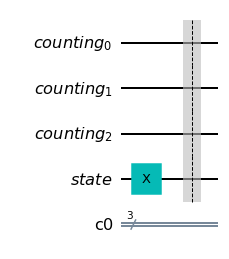

In [3]:
qc.x(q2[0])
qc.barrier()
qc.draw('mpl')

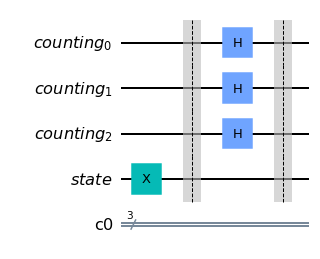

In [4]:
for i in range(n):
    qc.h(q1[i])
qc.barrier()
qc.draw('mpl')

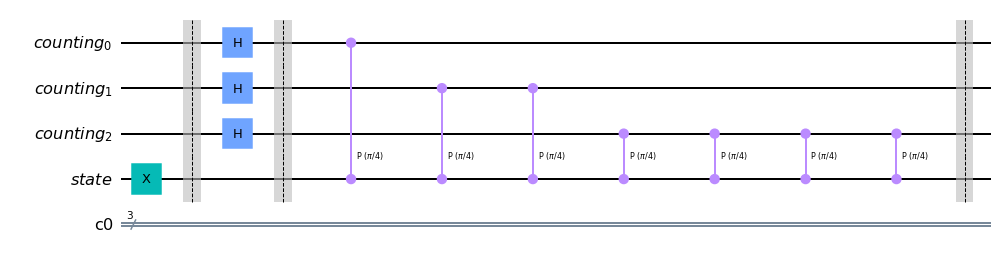

In [5]:
reps = 1
for i in range(n):
    for j in range(reps):
        qc.cp(theta,q1[i],q2[0])
    reps *= 2 
qc.barrier()
qc.draw('mpl')

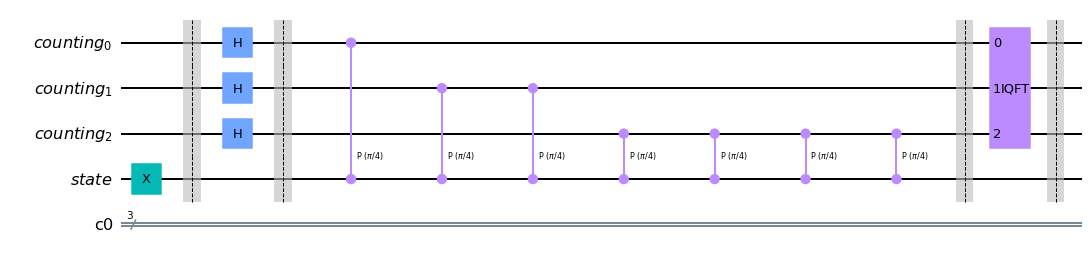

In [6]:
from qiskit.circuit.library import QFT
in_qft = QFT(num_qubits=n,inverse=True)
qc = qc.compose(in_qft)
qc.barrier()
qc.draw('mpl')

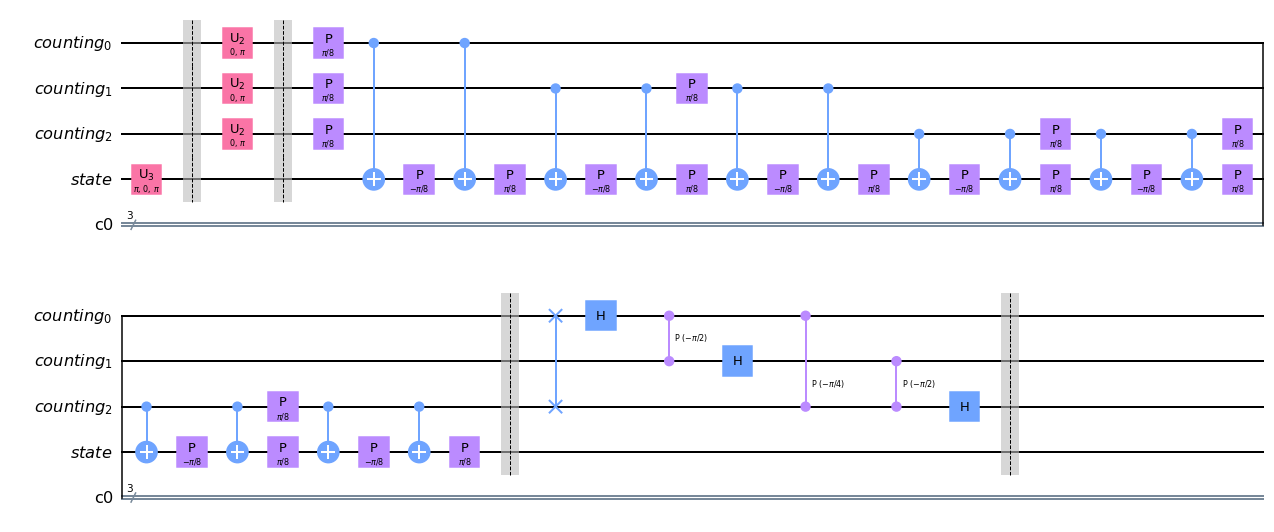

In [7]:
qc.decompose().draw('mpl')

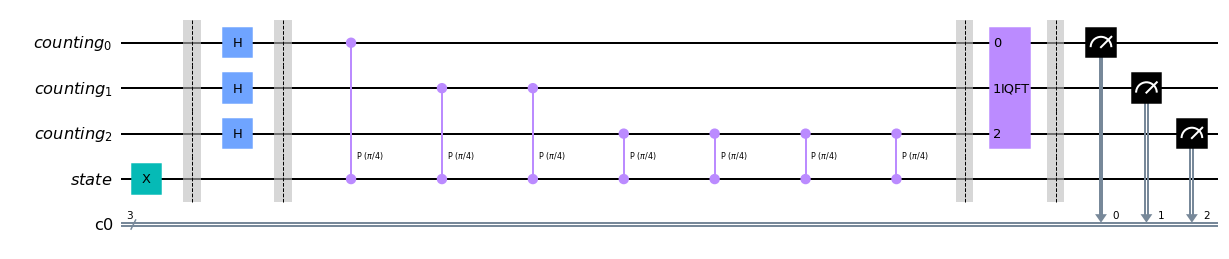

In [8]:
for i in range(n):
    qc.measure(q1[i],c[i])
qc.draw('mpl')

{'001': 1024}


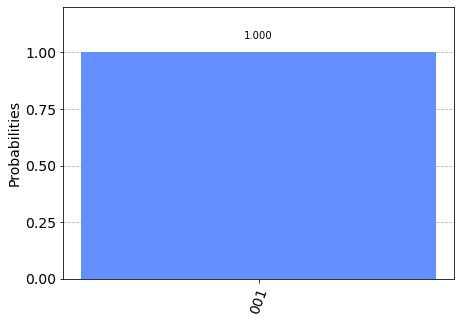

In [9]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [10]:
results = []
for key in counts.keys():
    results.append(key)

In [11]:
results

['001']

In [12]:
result_dec = int(results[0],2)

In [13]:
result_dec

1

In [19]:
theta_cal = (result_dec*2)/2**n

In [22]:
from qiskit.test.mock import FakeCasablanca
device_simulator = FakeCasablanca()


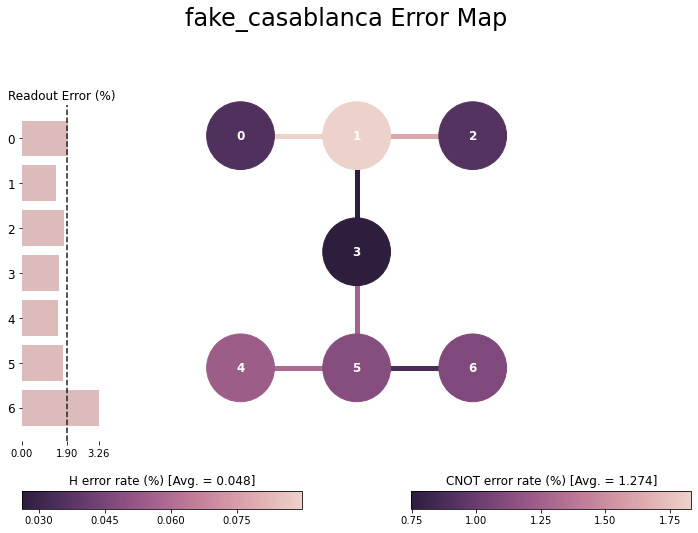

In [23]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

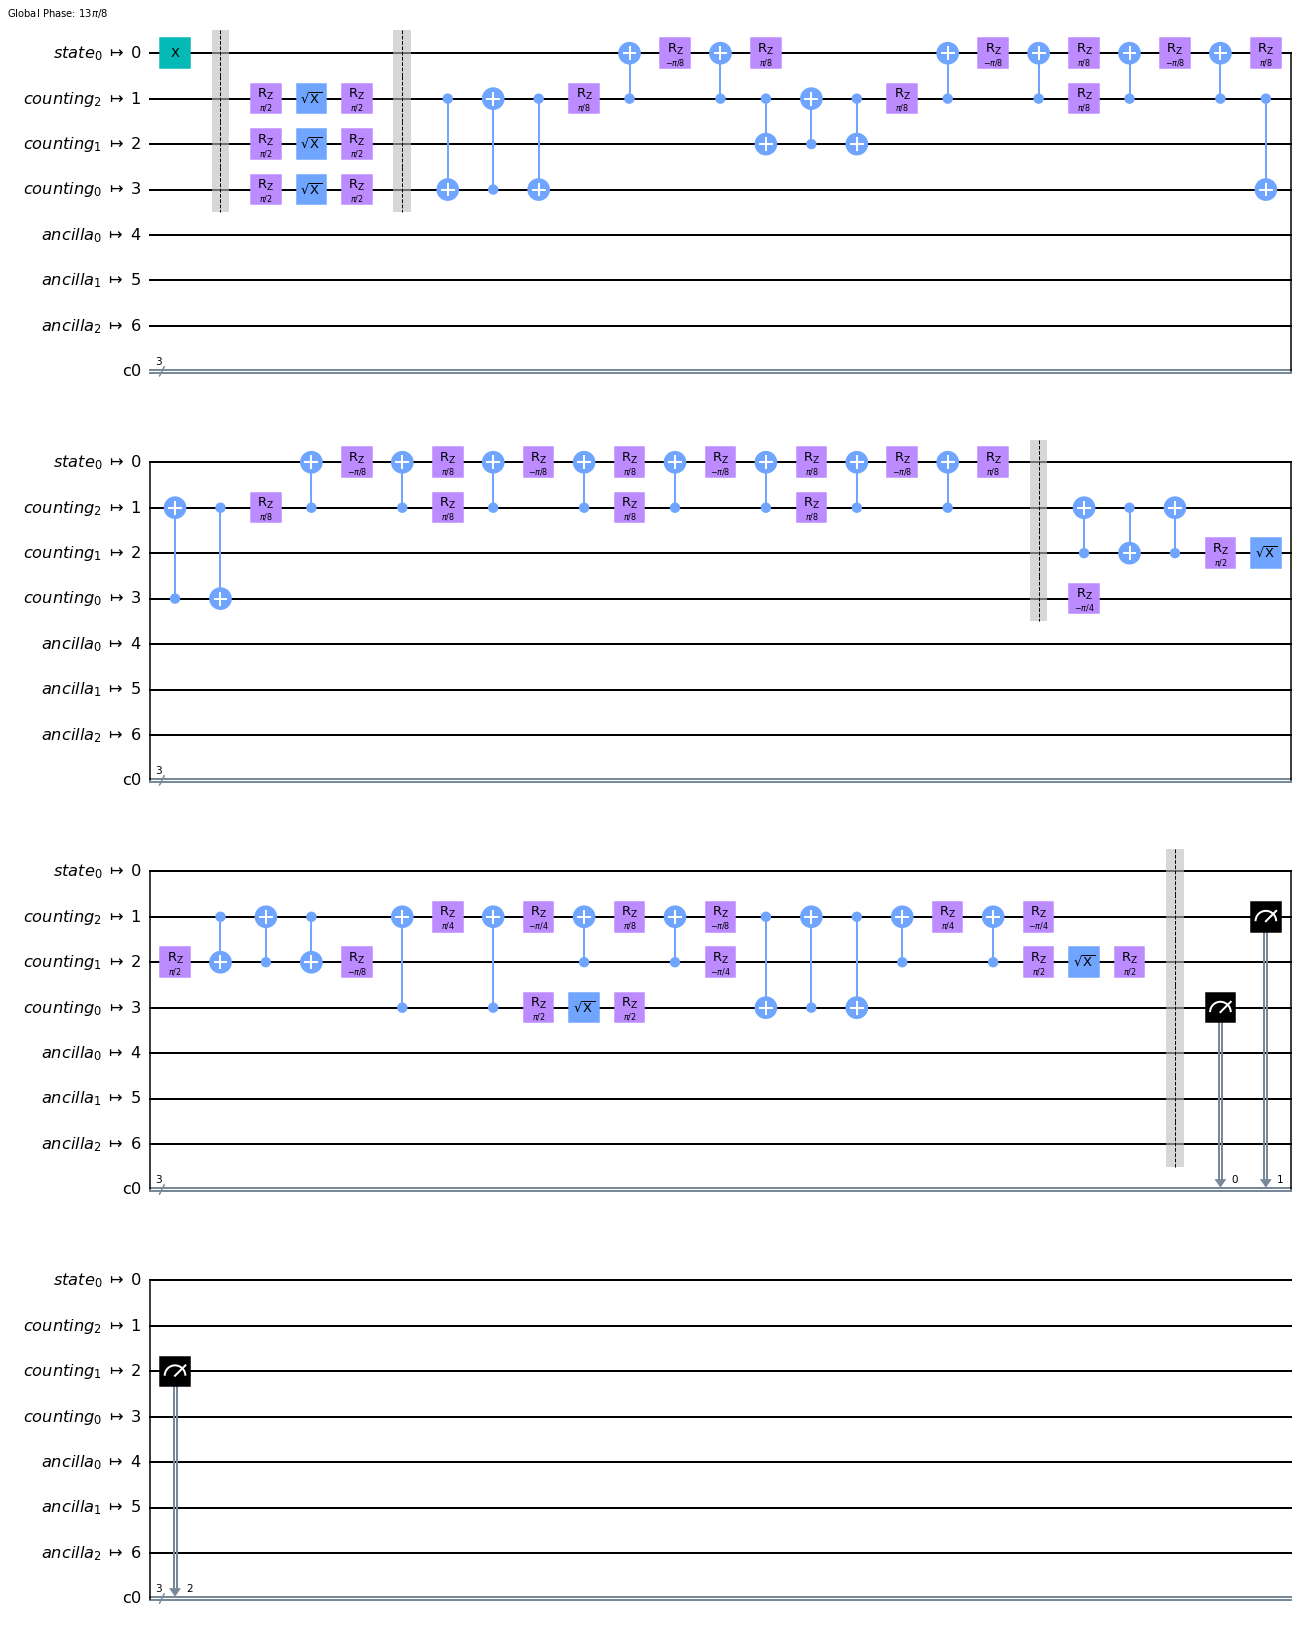

In [24]:
qc_compiled = transpile(qc, device_simulator)
qc_compiled.draw('mpl')

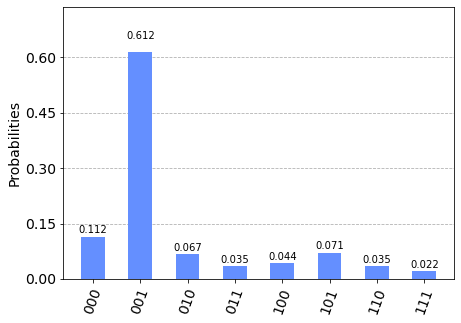

In [25]:
job = device_simulator.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts(qc_compiled)
plot_histogram(counts)